** packages **

In [1]:
from ctd2xray import cchdo
from mpl_toolkits.basemap import Basemap
from pymongo import MongoClient
import gsw
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
%matplotlib inline

** traj_0180-0210_0007012943 **

In [18]:
rcs_eddies = MongoClient().eddies.rcs_eddies

In [19]:
eddycode = 'traj_0180-0210_0007012943'

In [20]:
eddy = rcs_eddies.find_one({'_id': eddycode})
eddy = eddy['features'][2]['geometry']['coordinates']

In [21]:
obs_num = len(eddy)

In [22]:
lon_eddy = np.zeros(obs_num)
lat_eddy = np.zeros(obs_num)

In [23]:
for i in range(obs_num):
    lon_eddy[i] = eddy[i][0]
    lat_eddy[i] = eddy[i][1]

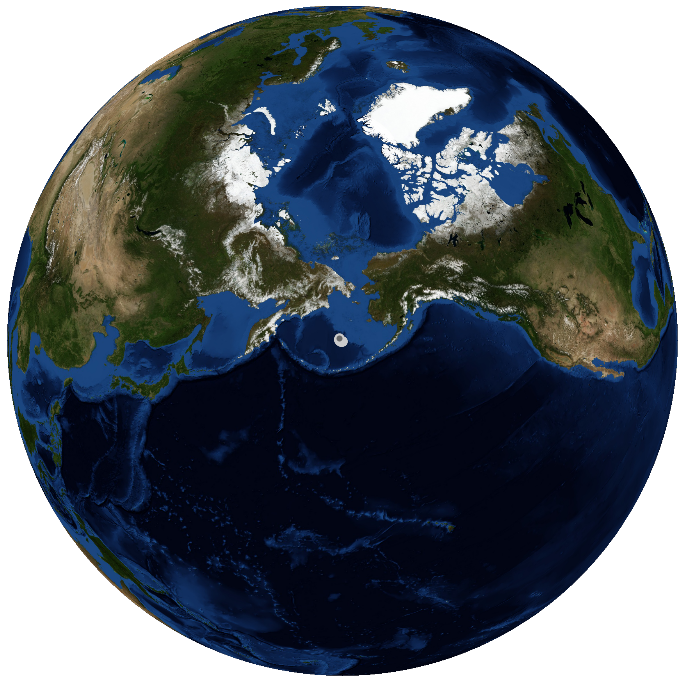

In [24]:
plt.rcParams['figure.figsize'] = (12, 12)
map_eddy = Basemap(projection='ortho', lon_0=eddy[0][0], lat_0=eddy[0][1], resolution='l')
map_eddy.drawmapboundary(color='none')
x, y = map_eddy(lon_eddy, lat_eddy)
map_eddy.plot(x, y, 'o', mec='#cccccc', mfc='#666666', markersize=8, markeredgewidth=2)
map_eddy.bluemarble()
plt.show()

** traj_5400-5430_0007027346 **

In [2]:
rcs_eddies = MongoClient().eddies.rcs_eddies

In [3]:
eddycode = 'traj_5400-5430_0007027346'

In [4]:
eddy = rcs_eddies.find_one({'_id': eddycode})
eddy = eddy['features'][2]['geometry']['coordinates']

In [5]:
obs_num = len(eddy)

In [6]:
lon_eddy = np.zeros(obs_num)
lat_eddy = np.zeros(obs_num)

In [7]:
for i in range(obs_num):
    lon_eddy[i] = eddy[i][0]
    lat_eddy[i] = eddy[i][1]

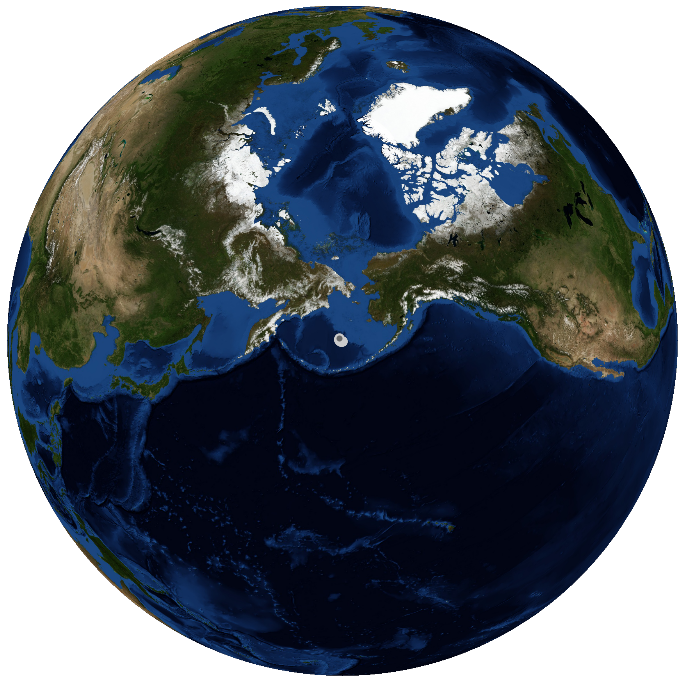

In [25]:
plt.rcParams['figure.figsize'] = (12, 12)
map_eddy = Basemap(projection='ortho', lon_0=eddy[0][0], lat_0=eddy[0][1], resolution='l')
map_eddy.drawmapboundary(color='none')
x, y = map_eddy(lon_eddy, lat_eddy)
map_eddy.plot(x, y, 'o', mec='#cccccc', mfc='#666666', markersize=8, markeredgewidth=2)
map_eddy.bluemarble()
plt.show()

** 325023_1 **

In [11]:
cchdo_ctd = MongoClient().eddies.cchdo_ctd

In [12]:
expocode = '325023_1'

In [13]:
cast_num = cchdo_ctd.find({'expocode': expocode}).count()

In [14]:
lon_expo = np.zeros(cast_num)
lat_expo = np.zeros(cast_num)

In [15]:
i = 0

In [16]:
for expo in cchdo_ctd.find({'expocode': expocode}):
    lon_expo[i] = expo['location']['coordinates'][0]
    lat_expo[i] = expo['location']['coordinates'][1]
    i = i+1

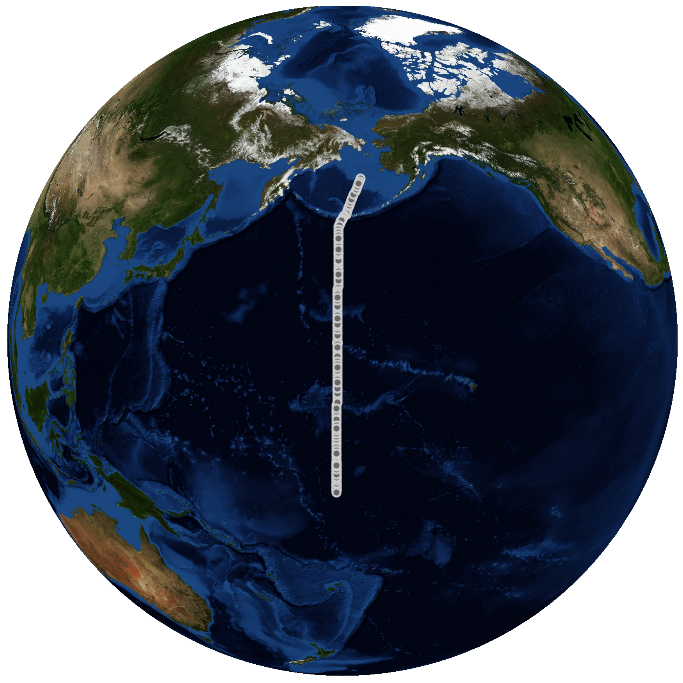

In [17]:
plt.rcParams['figure.figsize'] = (12, 12)
map_expo = Basemap(projection='ortho', lon_0=180, lat_0=30, resolution='l')
map_expo.drawmapboundary(color='none')
x, y = map_expo(lon_expo, lat_expo)
map_expo.plot(x, y, 'o', mec='#cccccc', mfc='#666666', markersize=8, markeredgewidth=2)
map_expo.bluemarble()
plt.show()

** 49NZ20071008 **

In [ ]:
cchdo_ctd = MongoClient().eddies.cchdo_ctd

In [ ]:
expocode = '49NZ20071008'

In [ ]:
cast_num = cchdo_ctd.find({'expocode': expocode}).count()

In [ ]:
lon_expo = np.zeros(cast_num)
lat_expo = np.zeros(cast_num)

In [ ]:
i = 0

In [ ]:
for expo in cchdo_ctd.find({'expocode': expocode}):
    lon_expo[i] = expo['location']['coordinates'][0]
    lat_expo[i] = expo['location']['coordinates'][1]
    i = i+1

In [ ]:
plt.rcParams['figure.figsize'] = (12, 12)
map_expo = Basemap(projection='ortho', lon_0=180, lat_0=30, resolution='l')
map_expo.drawmapboundary(color='none')
x, y = map_expo(lon_expo, lat_expo)
map_expo.plot(x, y, 'o', mec='#cccccc', mfc='#666666', markersize=8, markeredgewidth=2)
map_expo.bluemarble()
plt.show()

** temperature-salinity **

In [ ]:
target = 16

In [ ]:
for expo in cchdo_ctd.find({'expocode': expocode}):
    ds = xr.open_dataset(expo['path'])
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        plt.plot(sa, ct, color='#ff0000', zorder=2)
    elif (target-11) < station < target:
        plt.plot(sa, ct, color='#999999', zorder=1)
    elif target < station < (target+11):
        plt.plot(sa, ct, color='#999999', zorder=1)
plt.xlim([32.5, 35])
plt.ylim([0, 10])
plt.rcParams['figure.figsize'] = (12, 12)

** pressure-temperature **

In [ ]:
for expo in cchdo_ctd.find({'expocode': expocode}):
    ds = xr.open_dataset(expo['path'])
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        plt.plot(ct, p, color='#ff0000', zorder=2)
    elif (target-11) < station < target:
        plt.plot(ct, p, color='#999999', zorder=1)
    elif target < station < (target+11):
        plt.plot(ct, p, color='#999999', zorder=1)
plt.xlim([0, 10])
plt.ylim([1000, 0])
plt.rcParams['figure.figsize'] = (12, 12)

** pressure-salinity **

In [ ]:
for expo in cchdo_ctd.find({'expocode': expocode}):
    ds = xr.open_dataset(expo['path'])
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        plt.plot(sa, p, color='#ff0000', zorder=2)
    elif (target-11) < station < target:
        plt.plot(sa, p, color='#999999', zorder=1)
    elif target < station < (target+11):
        plt.plot(sa, p, color='#999999', zorder=1)
plt.xlim([32.5, 35])
plt.ylim([1000, 0])
plt.rcParams['figure.figsize'] = (12, 12)

** temperature-oxygen **

In [ ]:
for expo in cchdo_ctd.find({'expocode': expocode}):
    ds = xr.open_dataset(expo['path'])
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        plt.plot(o, p, color='#ff0000', zorder=2)
    elif (target-11) < station < target:
        plt.plot(o, p, color='#999999', zorder=1)
    elif target < station < (target+11):
        plt.plot(o, p, color='#999999', zorder=1)
plt.xlim([0, 350])
plt.ylim([1000, 0])
plt.rcParams['figure.figsize'] = (12, 12)

** contours **

In [ ]:
path_list = []
pressure = np.linspace(0, 6000, num=6001, endpoint=True)

In [ ]:
for expo in cchdo_ctd.find({'expocode': expocode}):
    path = expo['path']
    path_list.append(path)
    ds = xr.open_dataset(path)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    if station == target:
        eddy_lat = ds.latitude.values[0]

In [ ]:
eddy_lat

In [ ]:
path_list.sort()

In [ ]:
ds_tim = cchdo.open_cchdo_as_mfdataset(path_list, pressure)

In [ ]:
ds_lat = ds_tim.swap_dims({'time': 'latitude'})

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ds_lat.temperature_i.T.plot.contourf(yincrease=False, ax=ax, vmin=2, vmax=6, cmap='bwr')
plt.xlim([eddy_lat-5, eddy_lat+5])
plt.ylim([1000, 0])
plt.axvline(eddy_lat, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ds_lat.salinity_i.T.plot.contourf(yincrease=False, ax=ax, vmin=32.5, vmax=34.5, cmap='bwr')
plt.xlim([eddy_lat-5, eddy_lat+5])
plt.ylim([1000, 0])
plt.axvline(eddy_lat, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ds_lat.oxygen_i.T.plot.contourf(yincrease=False, ax=ax, vmin=0, vmax=350, cmap='bwr')
plt.xlim([eddy_lat-5, eddy_lat+5])
plt.ylim([1000, 0])
plt.axvline(eddy_lat, color='k')
plt.xlabel('$latitude$')
plt.ylabel('$pressure$')